In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# My data is in google drive.
train_dir ="drive/My Drive/Colab Notebooks/Datasets/Potato/train_set/"
test_dir="drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/"

In [0]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [0]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

3 Classes
1722 Train images
430 Test images


In [0]:
 # Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [0]:
# The name of the potatto diseases.
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [0]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 23104)            

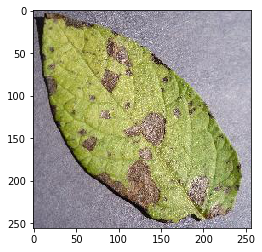

In [0]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/train_set/Potato___Early_blight/2.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/train_set/Potato___Early_blight/2.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [0]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 1722 images belonging to 3 classes.


In [0]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train=model.fit_generator(train_generator,
                          nb_epoch=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1) 

Epoch 1/15
53/53 [==============================] - 57s 1s/step - loss: 0.7750 - acc: 0.6268 - val_loss: 0.4822 - val_acc: 0.8367
Epoch 2/15
53/53 [==============================] - 58s 1s/step - loss: 0.3661 - acc: 0.8628 - val_loss: 0.3887 - val_acc: 0.8722
Epoch 3/15
53/53 [==============================] - 58s 1s/step - loss: 0.2796 - acc: 0.8944 - val_loss: 0.1779 - val_acc: 0.9308
Epoch 4/15
53/53 [==============================] - 56s 1s/step - loss: 0.2409 - acc: 0.9129 - val_loss: 0.1971 - val_acc: 0.9266
Epoch 5/15
53/53 [==============================] - 56s 1s/step - loss: 0.1596 - acc: 0.9376 - val_loss: 0.1026 - val_acc: 0.9598
Epoch 6/15
53/53 [==============================] - 55s 1s/step - loss: 0.1118 - acc: 0.9570 - val_loss: 0.0900 - val_acc: 0.9704
Epoch 7/15
53/53 [==============================] - 55s 1s/step - loss: 0.1340 - acc: 0.9533 - val_loss: 0.0895 - val_acc: 0.9615
Epoch 8/15
53/53 [==============================] - 55s 1s/step - loss: 0.1035 - acc: 0.96

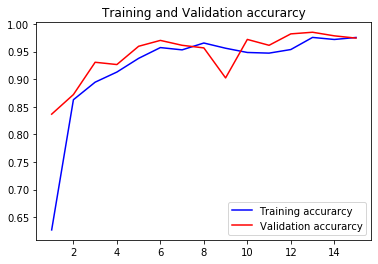

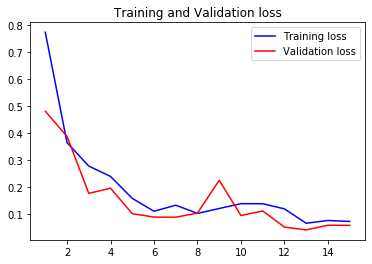

In [0]:
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

14/14 [==============================] - 2s 118ms/step
Test score is 0.1095639682093332
Test accuracy is 0.9534883712613306


In [0]:
from keras.models import load_model
model.save('crop.h5')

In [0]:
model.save_weights('crop_weights.h5')

In [0]:
model=load_model('crop.h5')


Potato___Early_blight


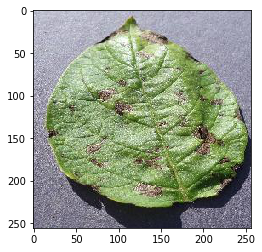

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy"]   
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potato_test_Early_Blight/0c4f6f72-c7a2-42e1-9671-41ab3bf37fe7___RS_Early.B 6752.JPG')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potato_test_Early_Blight/0c4f6f72-c7a2-42e1-9671-41ab3bf37fe7___RS_Early.B 6752.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Late_blight


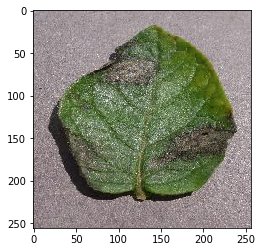

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy"]   
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potato_test_late_blight/0c83302d-4233-4e98-8ecf-755a970495bb___RS_LB 4904.JPG')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potato_test_late_blight/0c83302d-4233-4e98-8ecf-755a970495bb___RS_LB 4904.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Potato___healthy


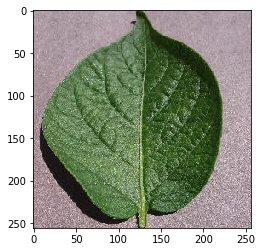

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy"]   
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potatto_test_healthy/1f9870b3-899e-46fb-98c9-cfc2ce92895b___RS_HL 1816.JPG')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/test_set/Potatto_test_healthy/1f9870b3-899e-46fb-98c9-cfc2ce92895b___RS_HL 1816.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Early_blight


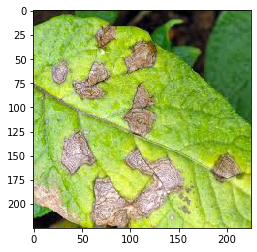

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy"]   
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/Potato early blight.jfif')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/Potato early blight.jfif')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Early_blight


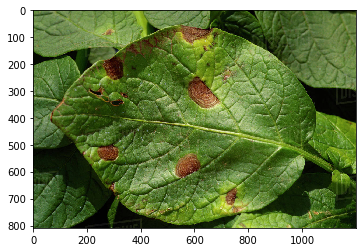

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/potato early 1.jpg')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/potato early 1.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Early_blight


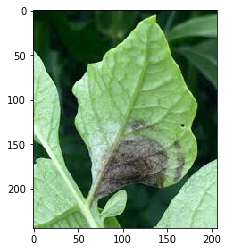

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/potato late 4.jfif')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/potato late 4.jfif')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Early_blight


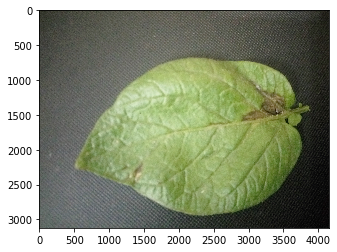

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real1.jpg')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real1.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Potato___healthy


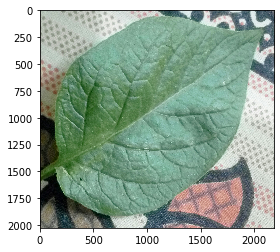

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real2.jpg')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real2.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Late_blight


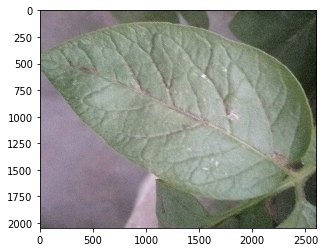

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real3.jpg')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real3.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Potato___healthy


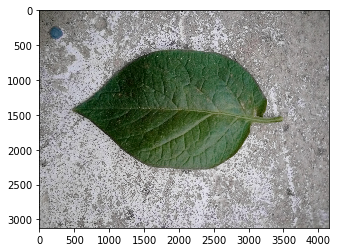

In [0]:
result = model.predict_classes([prepare('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real4.jpg')])
disease=image.load_img('/content/drive/My Drive/Colab Notebooks/Datasets/Potato/Images/real4.jpg')
plt.imshow(disease)
print (Classes[int(result)])

In [0]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('crop.h5') 
tfmodel = converter.convert() 
open ("output.tflite" , "wb") .write(tfmodel)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


47706920